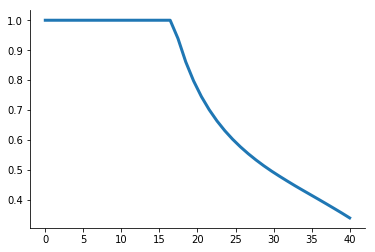

In [15]:
import numpy as np
from functools import partial


def g(x):
    return x ** (0.71)

def g_prime(x):
    return 0.71 * (x ** (- 0.29)) 

A = 0.75
delta = 0.06
r = 0.05
T = 60
theta = 0.5


def lambda_t(A, r, t, delta):
    rslt = ((A * np.exp(-r * t)) / (r  + delta)) * (1.0 - np.exp(-(r + delta ) * (T - t)))
    
    return rslt

s_grid = np.linspace(0.001, 1.0, num=5000, endpoint=True)
t_grid = np.linspace(0.0, 40, num=40, endpoint=True)

s_time = []

for t in t_grid:
    if t == 0.0:
        h_t = 5
    else:
        h_t = (1 - delta) * h_lagged + theta * g(s_t * h_lagged)
        
    def crit_func(A, r, t, delta, theta, h_t, s_t):

        return (- A * np.exp(-r * t) + lambda_t(A, r, t, delta) * theta * g_prime(s_t * h_t)) ** 2


    crit_func = partial(crit_func, A, r, t, delta, theta, h_t)
    crit_func = np.vectorize(crit_func)


    s_t = s_grid[np.argmin(crit_func(s_grid))]

    h_lagged = h_t

    s_time += [s_t]

#    # Trying to calculate first period investment
#    rslt = - A * np.exp(-r * t) + lambda_t(A, r, t, delta) * theta * g_prime(s_t * h_initial)
#    print(rslt, s_t)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(t_grid, s_time)